In [2]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f5

In [4]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 960.0 kB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 2.1 MB/s eta 0:00:

In [4]:
df=pd.read_csv('Elon_musk.csv',encoding='latin',error_bad_lines=False)
df

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [5]:
df=df['Text']
df

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [6]:
# remove both the leading and the trailing characters
df = [y.strip() for y in df]
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [8]:
# Joining the list into one string/text
text = ' '.join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [9]:
#Punctuation
no_punc_text=text.translate(str.maketrans("\x92", "'", string.punctuation))
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [13]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
text_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [14]:
text_tokens[0:72]

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed']

In [15]:
len(text_tokens)

21373

In [16]:
from nltk.corpus import stopwords

In [18]:
import nltk
nltk.download('stopwords')
my_stop_words=stopwords.words('english')
my_stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [20]:
#Normalize the data
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [21]:
#stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [24]:
!python -m spacy download en_core_web_sm 

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.8 MB/s eta 0:00:08
      --------------------------------------- 0.3/12.8 MB 2.9 MB/s eta 0:00:05
     - -------------------------------------- 0.5/12.8 MB 3.7 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 6.5 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 11.2 MB/s eta 0:00:01
     -------------- ------------------------- 4.8/12.8 MB 17.0 MB/s eta 0:00:01
     -------------------- ------------------- 6.7/12.8 MB 20.4 MB/s eta 0:00:01
     ----------------------- ---------------- 7.5/12.8 MB 21.9 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.8 MB 18.1 MB/s eta 0:00:01
     -------------------------------- ------ 10.5/12.8 MB 27.3 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 34.4 MB/s eta 0:00:01
     --------------------------------------- 12.8/12

In [26]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [28]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [30]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations']


## Feature Extraction :

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [33]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

kunalb11  alien  idaacarmack   ray  trace  cyberpunk   hdr  nextlevel  \
0      2694    231         2432  3616   4493        959  1669       3150   

   have   try  ...  dire  priority  surreal  propaganda  social  \
0  1664  4528  ...  1075      3505     4248        3541    4031   

   httpstcowjrzibkh1h  click  samwise  gamgee  altho  
0                2324    773     3816    1525    247  

[1 rows x 4965 columns]

In [34]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
kunalb11            2694
alien                231
idaacarmack         2432
ray                 3616
trace               4493
...                  ...
httpstcowjrzibkh1h  2324
click                773
samwise             3816
gamgee              1525
altho                247

[4965 rows x 1 columns]

In [35]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

0
ðogecoin         4964
zzcool           4963
zwiebelbach      4962
zubinanary       4961
zshauladventure  4960
zone             4959
zon              4958
zogfotpik        4957
zip2             4956
zikryzamir       4955
zero             4954
zenit            4953
zeitmas          4952
zealand          4951
zainraz4         4950
yup              4949
ystijd           4948
youyanggu        4947
yourfavgas       4946
youranonnews     4945
youranonnew      4944
your             4943
young            4942
younesh1989      4941
you              4940
york             4939
yolt             4938
yoda             4937
yo               4936
yet              4935

In [36]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

0
005             0
10              1
100             2
1000            3
10000           4
107             5
10x             6
11              7
112             8
11thhour        9
12             10
122            11
13             12
130pm          13
13arm13arm     14
13ericralph31  15
14             16
140pm          17
149watt        18
14yearold      19
15             20
150            21
155            22
16             23
162            24

In [37]:
print(vectorizer.vocabulary_)

{'kunalb11': 2694, 'alien': 231, 'idaacarmack': 2432, 'ray': 3616, 'trace': 4493, 'cyberpunk': 959, 'hdr': 1669, 'nextlevel': 3150, 'have': 1664, 'try': 4528, 'joerogan': 2614, 'spotify': 4111, 'great': 1603, 'interview': 2543, 'gtera27': 1622, 'doge': 1110, 'underestimate': 4661, 'teslacn': 4338, 'congratulations': 855, 'tesla': 4332, 'china': 739, 'amazing': 257, 'execution': 1320, 'last': 2714, 'year': 4932, 'now': 3190, 'next': 3149, 'even': 1292, 'happy': 1651, 'new': 3146, 'ox': 3308, 'httpstco9wfkmyu2oj': 1859, 'frodo': 1489, 'underdoge': 4660, 'all': 234, 'thought': 4417, 'would': 4907, 'fail': 1356, 'himself': 1715, 'httpstcozgxjfdzzrm': 2392, 'owensparks': 3305, 'flcnhvy': 1430, 'anonyx10': 286, 'haha': 1636, 'thanks': 4376, 'indeed': 2481, 'tweets': 4551, 'definitely': 1014, 'represent': 3699, 'realworld': 3641, 'time': 4436, 'allocation': 236, 'the': 4383, 'entertaining': 1248, 'outcome': 3285, 'likely': 2775, 'givedirectly': 1574, 'just': 2641, 'send': 3884, 'agree': 200, 

In [40]:
print(vectorizer.get_feature_names_out()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']


In [41]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
print(X.toarray().shape)

(16023, 4965)


### Let's see how can bigrams and trigrams can be included here

In [43]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(df)
bow_matrix_ngram


<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [45]:
print(vectorizer_ngram_range.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [46]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TFidf vectorizer :

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm='l2',
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(df)


In [52]:
print(vectorizer_n_gram_max_features.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [53]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.38777203]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Generate wordcloud :

In [54]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(60,40))
    plt.imshow(wordcloud)
    plt.axis("off")

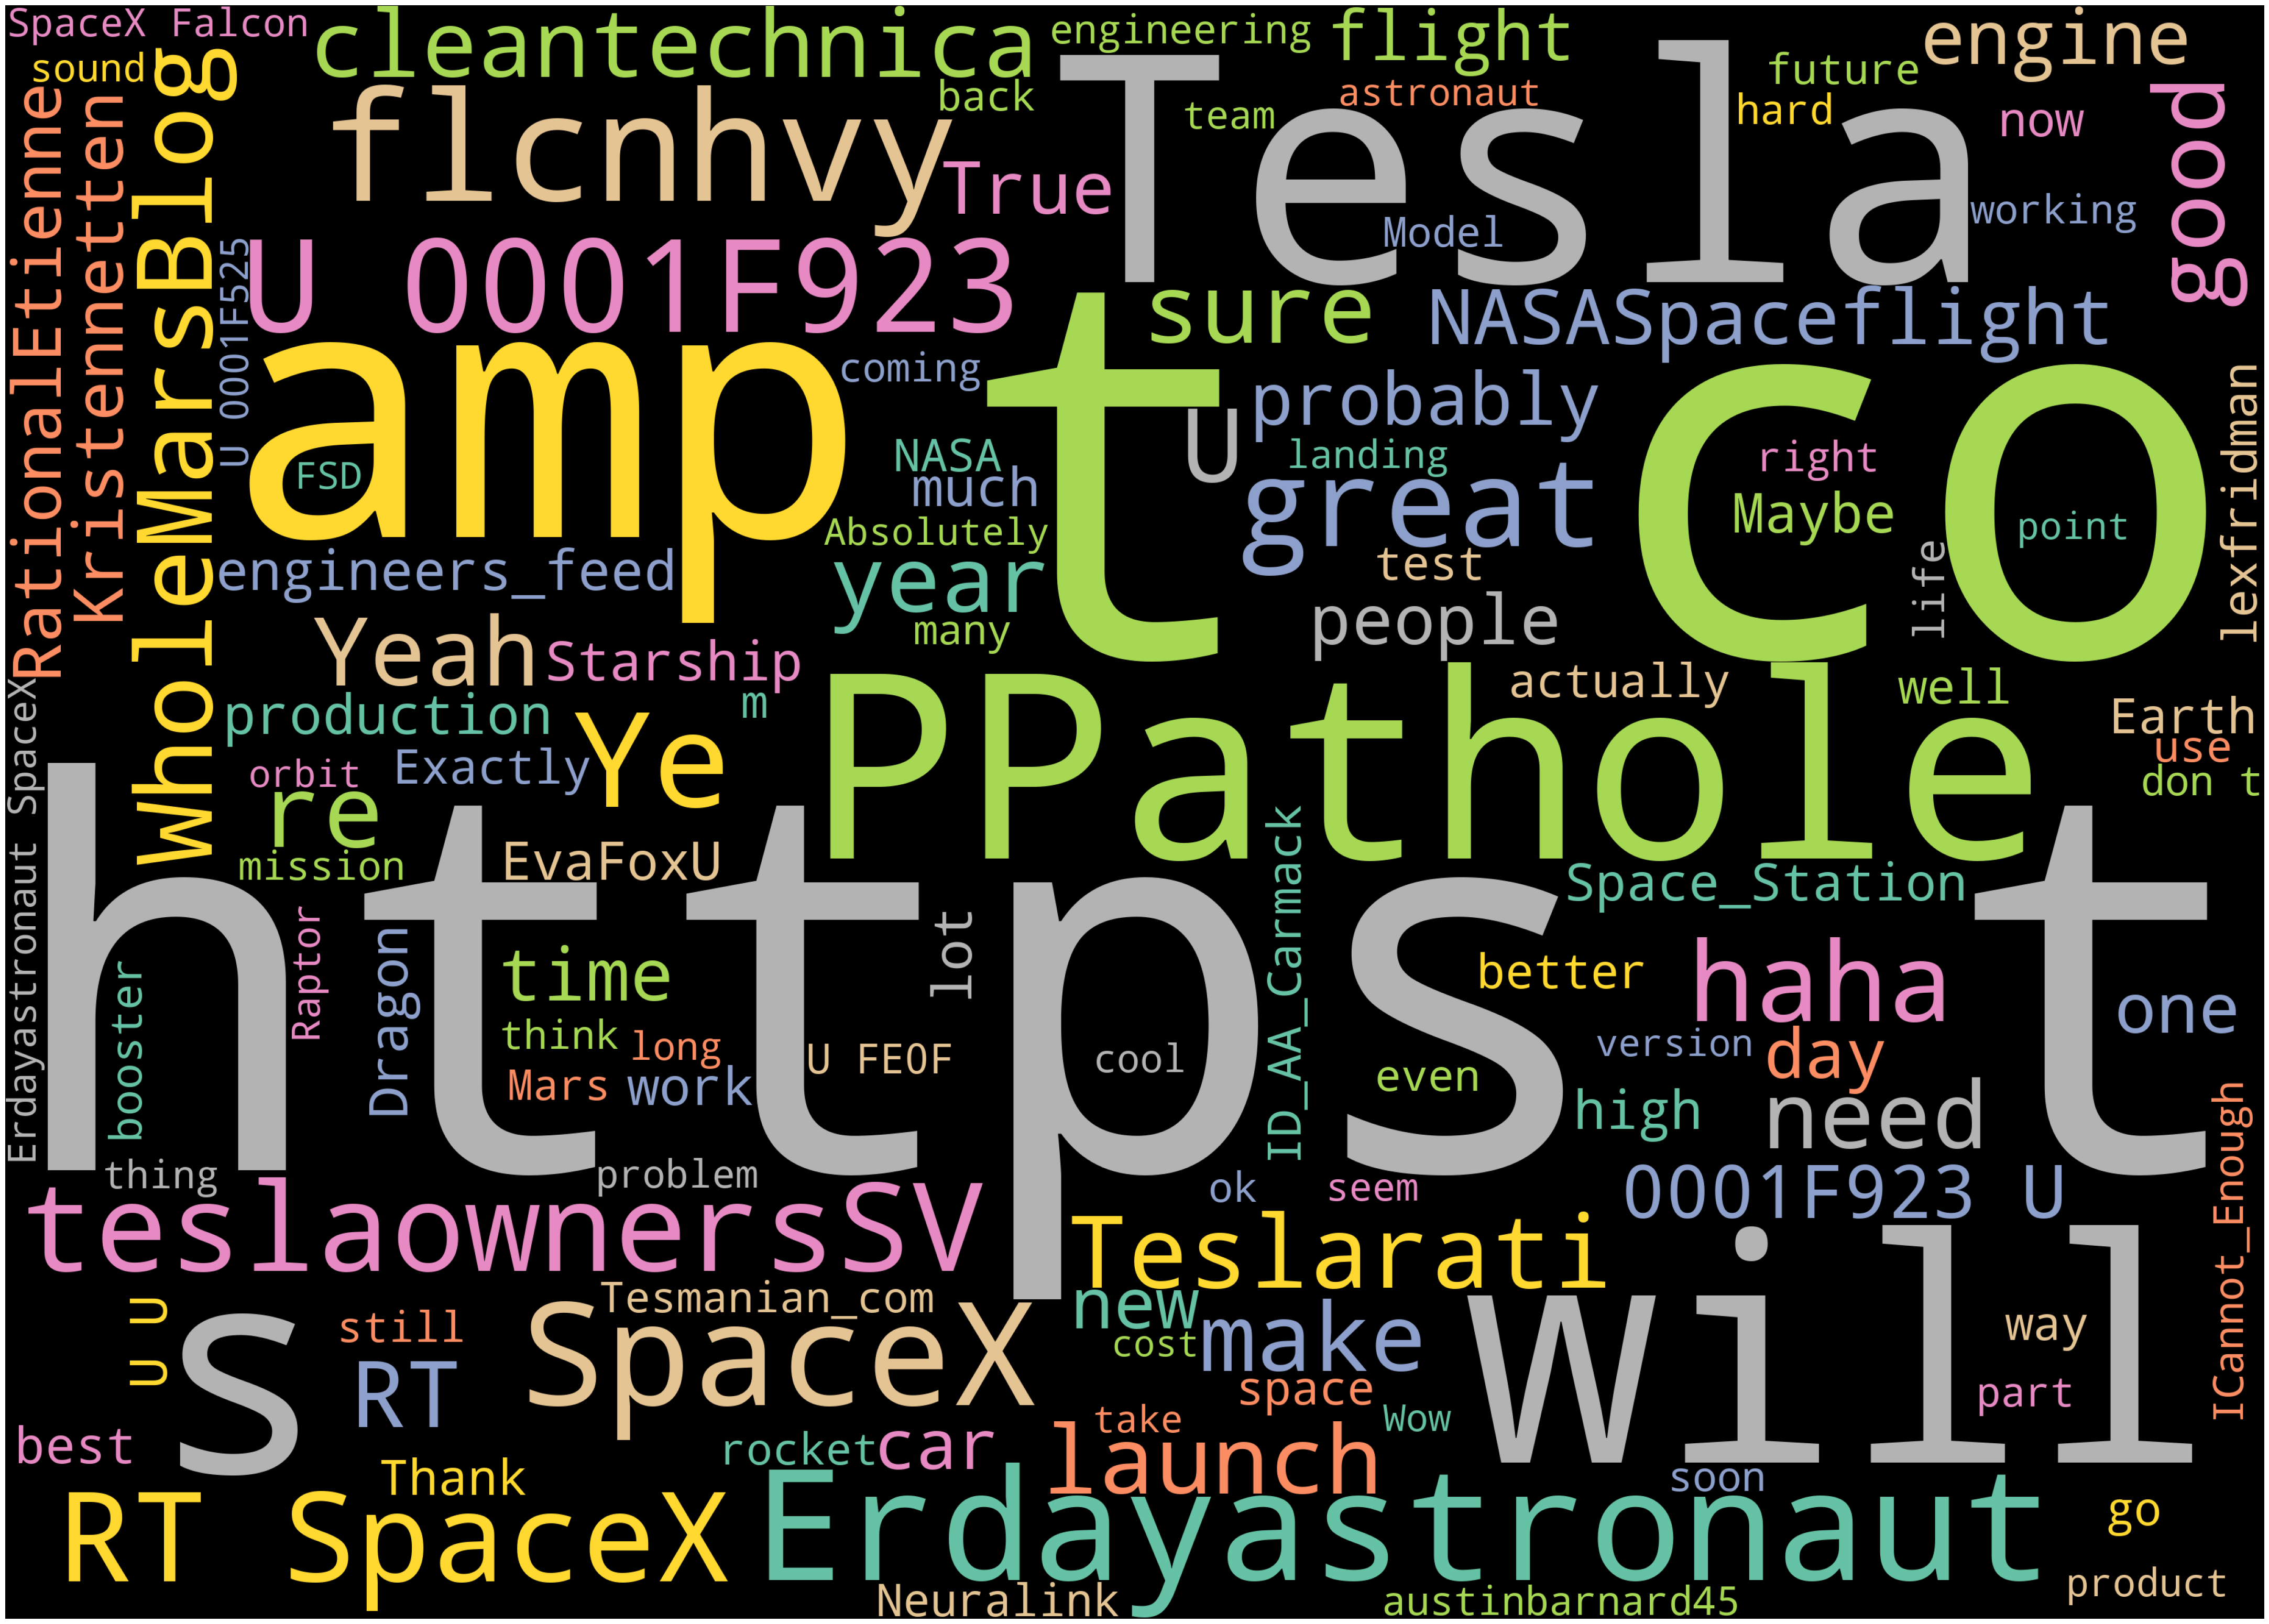

In [55]:
#Generate wordcloud
wordcloud = WordCloud(width=3500,height=2500,background_color='black',max_words=120,colormap='Set2').generate(text)
#plot
plot_cloud(wordcloud)

In [56]:
df1=pd.read_csv('Elon_musk.csv',encoding='latin',error_bad_lines=False)
df1

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [57]:
df1=df1['Text']
df1

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [58]:
df1 = [x.strip() for x in df1] # remove both the leading and the trailing characters
df1 = [x for x in df1 if x] # removes empty strings, because they are considered in Python as False
df1[0:10]


['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [59]:
one_block = df1[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [60]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [63]:
for token in doc_block[:]:
    print(token,token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [64]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

In [65]:
len(nouns_verbs)

3

In [66]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [67]:
X.shape

(3, 3)

In [68]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [69]:
cv.get_feature_names_out()

array(['level', 'tracing', 'tried'], dtype=object)

In [70]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(),columns= cv.get_feature_names_out())
temp_df

level  tracing  tried
0      0        1      0
1      1        0      0
2      0        0      1

In [71]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1]], dtype=int64)

In [72]:
type(sum_words)

numpy.matrix

In [73]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [74]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [76]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names_out(),
                      'count' : np.array(sum_words).flatten()})
wf_df

word  count
0    level      1
1  tracing      1
2    tried      1

## Visualizing results :

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

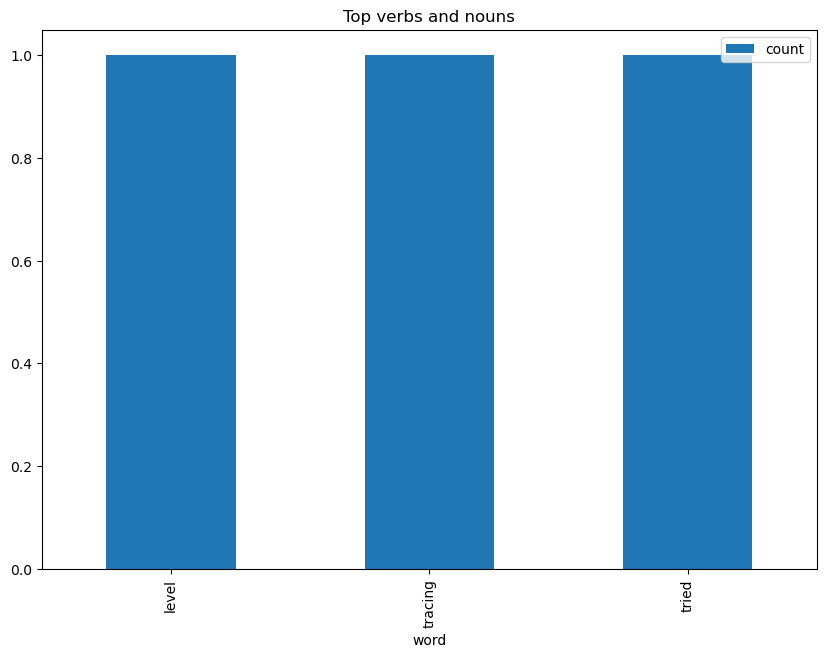

In [77]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word',figsize=(10,7),title='Top verbs and nouns')

## Emotion Mining :

In [79]:
#Sentiment analysis
emos = pd.read_csv('Afinn.csv', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1')
emos

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [80]:
emos[1500:]

word  value
1500  masterpieces      4
1501        matter      1
1502       matters      1
1503        mature      2
1504    meaningful      2
...            ...    ...
2472         yucky     -2
2473         yummy      3
2474        zealot     -2
2475       zealots     -2
2476       zealous      2

[977 rows x 2 columns]

In [81]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(''.join(df1))
sentences

['@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!',
 '!Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJo

In [82]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated@teslacn Congra...
4                    Now on to the next for even more!
..                                                 ...
857  Everything weve ever sensed or thought has be...
858  @kenyanwalstreet Not actually a payout, just a...
859  It may never pay out, as the stock cant b
 ht...
860  Details Aug 28.AI symbiosis while u wait@vista...
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...

[862 rows x 1 columns]

In [83]:
affinity_scores = emos.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [84]:
nlp = spacy.load('en_core_web_sm')

In [90]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score


In [91]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [92]:
calculate_sentiment(text = 'wonderful session')

4

In [93]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [94]:
calculate_sentiment(text = 'good')

3

In [95]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [96]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [97]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [98]:
sent_df

sentence  sentiment_value
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated@teslacn Congra...                4
4                    Now on to the next for even more!                0
..                                                 ...              ...
857  Everything weve ever sensed or thought has be...                2
858  @kenyanwalstreet Not actually a payout, just a...                0
859  It may never pay out, as the stock cant b
 ht...               -4
860  Details Aug 28.AI symbiosis while u wait@vista...               -2
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...                0

[862 rows x 2 columns]

In [99]:
sent_df.iloc[4,0]

'Now on to the next for even more!'

In [100]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated@teslacn Congra...                4   
4                    Now on to the next for even more!                0   
..                                                 ...              ...   
857  Everything weve ever sensed or thought has be...                2   
858  @kenyanwalstreet Not actually a payout, just a...                0   
859  It may never pay out, as the stock cant b
 ht...               -4   
860  Details Aug 28.AI symbiosis while u wait@vista...               -2   
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...                0   

     word_count  
0            12  
1             4  
2             4  
3            12  
4             8  
..          ...  
857          15  
858          11  
859          30  
860          46  
861          13  

[862 rows x 3 columns]

In [101]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
790  Giving each person money allows them to decid
...                9   
39   @thejackbeyer @NASASpaceflight Cryoproof, then...                9   
528  SN9 next month.Starship SN8 with rear body fla...               10   
614  Its not useful for predicting the future, nor...               10   
674  We just havent observed the
 https://t.co/mez...               12   
170  Also, w
 https://t.co/IYdKttVsqk@cleantechnica...               12   
607  Its
 https://t.co/IxhyT6NuiC@Teslarati Tesla ...               13   
554  The open areas
 https://t.co/rabjKrtQlw@Save...               14   
33   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               14   
99   @Erdayastronaut @SpaceX Was also thinking that...               16   

     word_count  
790          45  
39           71  
528          72  
614         116  
674          61  
170          92  
607          60  
554         129  
33          203  
99           89

In [102]:
sent_df.sort_values(by='sentiment_value').head(15)

sentence  sentiment_value  \
59   Also, the road to hell is mostly paved with ba...               -7   
827  This is primarily an electrical/electronic (ch...               -7   
609  Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...               -6   
332  Austin jobs now avaihttps://t.co/d0i2w8wNKGYes...               -4   
859  It may never pay out, as the stock cant b
 ht...               -4   
638  Occasional flights from land are ok, but frequ...               -4   
576  Then static fire, checkouts, static fire, fly ...               -4   
472  @tesladri @ChananBos @raytech247 @WholeMarsBlo...               -3   
698  @TimFernholz So why is this madness acceptable...               -3   
453  Pretty odd
 https://t.co/PPSorKWdI8@enn_nafnla...               -3   
452  He plays the poor inventor card, but was ric...               -3   
720  Latter also s
 https://t.co/dlMy5rybrK@NASASpa...               -3   
264  Production/testing of rocket engines is over 9...               -3   
418  We also have to consider population life-month...               -3   
277  No symptoms for past few days, apart from fati...               -3   

     word_count  
59           11  
827          72  
609          56  
332          10  
859          30  
638          36  
576          12  
472          36  
698          10  
453          73  
452          33  
720         115  
264          20  
418          45  
277           9

In [103]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    862.000000
mean       1.163573
std        2.480103
min       -7.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [104]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
0  @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0   
1                                 Have you tried it?                0   
4                  Now on to the next for even more!                0   
6  https://t.co/9WFKMYu2ojFrodo was the underdoge...               -2   
9  https://t.co/3pWt@ajtourville Yes@BLKMDL3 @Rat...               -1   

   word_count  
0          12  
1           4  
4           8  
6          13  
9          25

In [105]:
sent_df[sent_df['sentiment_value']<-5]

sentence  sentiment_value  \
59   Also, the road to hell is mostly paved with ba...               -7   
609  Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...               -6   
827  This is primarily an electrical/electronic (ch...               -7   

     word_count  
59           11  
609          56  
827          72

In [106]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

59     Also, the road to hell is mostly paved with ba...
609    Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...
827    This is primarily an electrical/electronic (ch...
Name: sentence, dtype: object

In [107]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q@justpaulinelol It\x92s too embarrassingJust learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F>@ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv@l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'This is primarily an electrical/electronic (chip design)/me\x85 https://t.co/VMq2atdV5dRT @SpaceX: Targeting Monday, July 20 for Falcon 9 launch of ANASIS-II from SLC-40Solving high-volume, high-reliability, low-cost production problems is especially valuedIf you\x92ve solved hard problems with phones / wearables (sealing, signal processing, inductive charging, power mgmt,\x85 https://t.co/rq3AWMZxvo@serhatserhatst Many@PPathole Summarizes pretty much every biz school case st

In [108]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [109]:
sent_df['index'] = range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

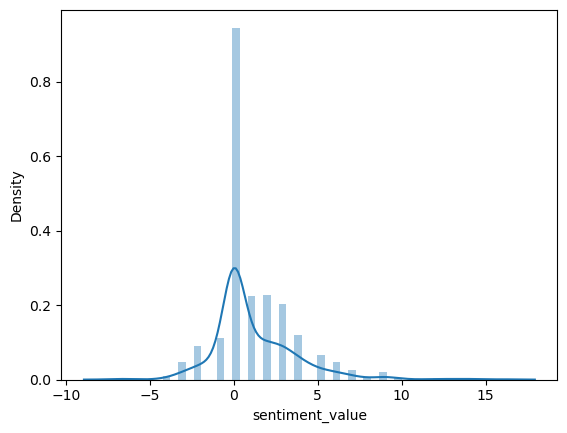

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

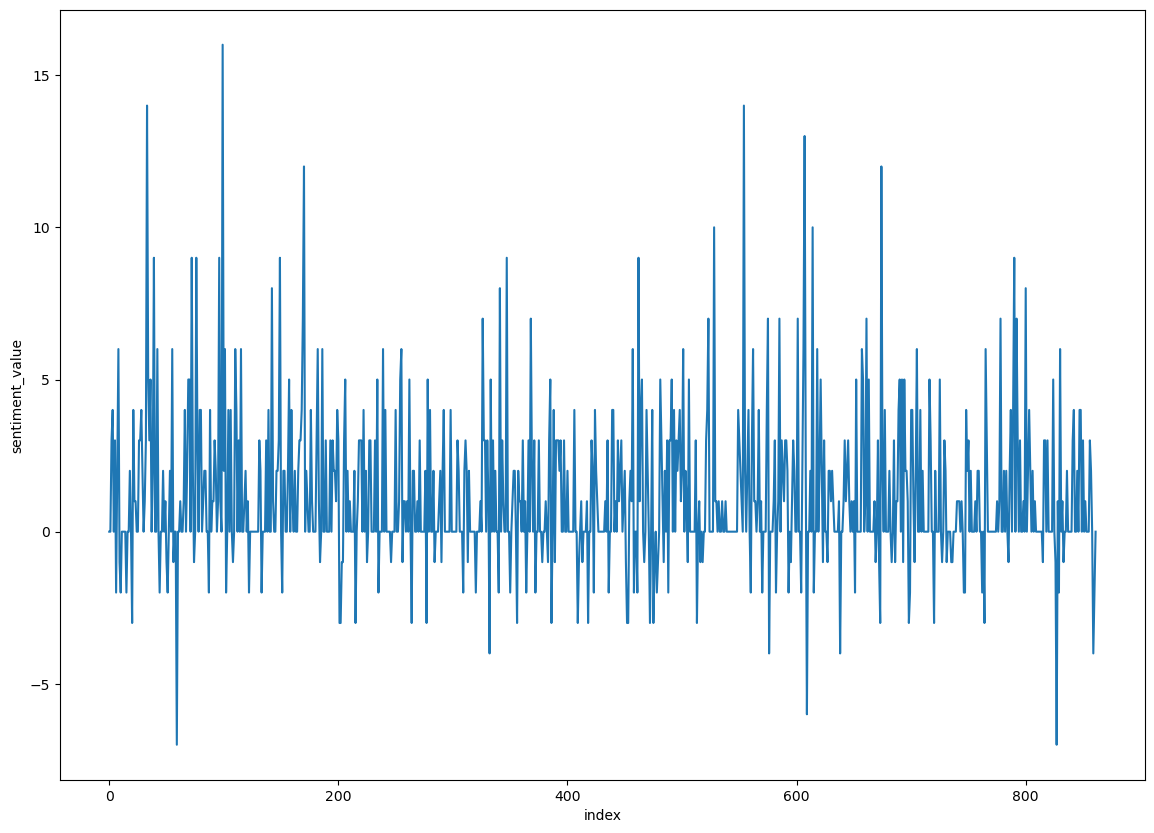

In [111]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

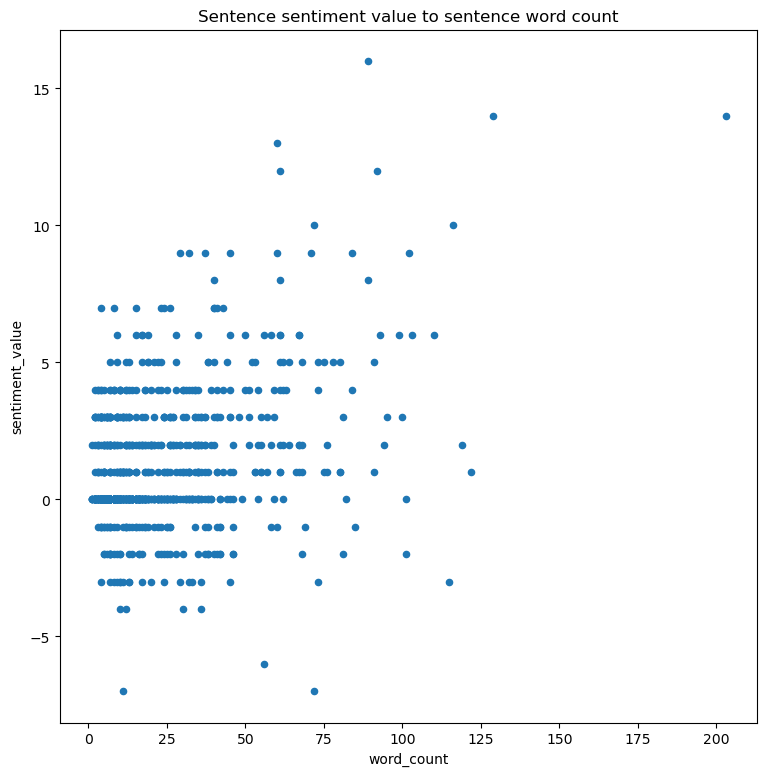

In [112]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [114]:
# PW for positive words 
# NW for Negative Words
PW=pd.read_csv('positive-words.txt', 
               error_bad_lines = False)
PW

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                           
1                           ; Opinion Lexicon: Positive                          
2                                                     ;                          
3     ; This file contains a list of POSITIVE opinio...                          
4                                                     ;                          
...                                                 ...                          
2026                                           youthful                          
2027                                               zeal                          
2028                                             zenith                          
2029                                               zest                          
2030                                              zippy                          

[2031 rows x 1 columns]

In [115]:
NW=pd.read_csv('negative-words.txt', 
               error_bad_lines = False,
               encoding='latin-1')
NW

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                             
1                           ; Opinion Lexicon: Negative                            
2                                                     ;                            
3     ; This file contains a list of NEGATIVE opinio...                            
4                                                     ;                            
...                                                 ...                            
4803                                               zaps                            
4804                                             zealot                            
4805                                            zealous                            
4806                                          zealously                            
4807                                             zombie                            

[4808 rows x 1 columns]

In [116]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

Words  Score
0            a+      1
1        abound      1
2       abounds      1
3     abundance      1
4      abundant      1
...         ...    ...
2001   youthful      1
2002       zeal      1
2003     zenith      1
2004       zest      1
2005      zippy      1

[2006 rows x 2 columns]

In [117]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

Words  Score
0        2-faced     -1
1        2-faces     -1
2       abnormal     -1
3        abolish     -1
4     abominable     -1
...          ...    ...
4778        zaps     -1
4779      zealot     -1
4780     zealous     -1
4781   zealously     -1
4782      zombie     -1

[4783 rows x 2 columns]

In [118]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [119]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [120]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [122]:
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                1   
3    @gtera27 Doge is underestimated@teslacn Congra...                1   
4                    Now on to the next for even more!                0   
..                                                 ...              ...   
857  Everything weve ever sensed or thought has be...                0   
858  @kenyanwalstreet Not actually a payout, just a...                0   
859  It may never pay out, as the stock cant b
 ht...               -1   
860  Details Aug 28.AI symbiosis while u wait@vista...                0   
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...                0   

     word_count  index  
0            12      0  
1             4      1  
2             4      2  
3            12      3  
4             8      4  
..          ...    ...  
857          15    857  
858          11    858  
859          30    859  
860          46    860  
861          13    861  

[862 rows x 4 columns]

In [123]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                1   
3    @gtera27 Doge is underestimated@teslacn Congra...                1   
4                    Now on to the next for even more!                0   
..                                                 ...              ...   
857  Everything weve ever sensed or thought has be...                0   
858  @kenyanwalstreet Not actually a payout, just a...                0   
859  It may never pay out, as the stock cant b
 ht...               -1   
860  Details Aug 28.AI symbiosis while u wait@vista...                0   
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...                0   

     word_count  index  
0            12      0  
1             4      1  
2             4      2  
3            12      3  
4             8      4  
..          ...    ...  
857          15    857  
858          11    858  
859          30    859  
860          46    860  
861          13    861  

[862 rows x 4 columns]

In [124]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
347  @Chad_Hurley @realDonaldTrump @kanyewest Stop ...                5   
614  Its not useful for predicting the future, nor...                5   
280  It was designed from the beginning with human ...                5   
99   @Erdayastronaut @SpaceX Was also thinking that...                6   
33   @ajtourville @Erdayastronaut @SpaceX Yes, but ...                7   

     word_count  index  
347          60    347  
614         116    614  
280          61    280  
99           89     99  
33          203     33

In [125]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
827  This is primarily an electrical/electronic (ch...               -6   
609  Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...               -4   
340  4D is essential for dynamically occluded objec...               -3   
715  A full blown Starship and SuperHeavy will be h...               -2   
350  The Model 3 ramp was extreme stress &amp; pa
 ...               -2   

     word_count  index  
827          72    827  
609          56    609  
340          41    340  
715          33    715  
350          25    350

In [126]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    862.000000
mean       0.418794
std        1.187339
min       -6.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.000000
Name: sentiment_value, dtype: float64

In [127]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

sentence  sentiment_value  \
6   https://t.co/9WFKMYu2ojFrodo was the underdoge...               -1   
10  However, if we don
 https://t.co/9Z8Ac6skqx@Ra...               -1   
15  Thats what youre missing.Back to work I go@C...               -1   
20  https://t.co/UEEocOfcTbThe people have spoken ...               -1   
27  !The Second Last Kingdom https://t.co/Je4EI88H...               -1   

    word_count  index  
6           13      6  
10          38     10  
15          37     15  
20          32     20  
27          31     27

In [128]:
sent_df[sent_df['sentiment_value']<-1]

sentence  sentiment_value  \
52   You
 https://t.co/6gO7EHq9qy@avalonpenrose A h...               -2   
59   Also, the road to hell is mostly paved with ba...               -2   
87   Ship is held down by massive pins while engine...               -2   
133  Stop the sneaky moves, Charlie Ergen!Entertain...               -2   
147  We couldnt get everything done in
 https://t....               -2   
184  !Fuel header tank pressure was low during land...               -2   
201  @RGVaerialphotos It will be real soon@MarcusHo...               -2   
202  External
 https://t.co/csIZk6sEVu@bcart03 @nex...               -2   
277  No symptoms for past few days, apart from fati...               -2   
285  Last week, I had sym
 https://t.co/gL0mhrqJxY@...               -2   
303  @slashdot Feels that way@WhatsupFranks @bluemo...               -2   
309  Their main PCR search is for the N1 gene, uniq...               -2   
312  Whats the approximate false posi
 https://t.c...               -2   
340  4D is essential for dynamically occluded objec...               -3   
350  The Model 3 ramp was extreme stress &amp; pa
 ...               -2   
367  Transferring propellant
 https://t.co/vPIIPpDV...               -2   
409  @SpaceX Just a small-seeming issue with loss o...               -2   
436  Baby dont hurt me. Winston Churchill@PlayOv...               -2   
576  Then static fire, checkouts, static fire, fly ...               -2   
604  Its when you hang out there that problems arise.               -2   
609  Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...               -4   
675  @CowderySedge @tbdnonymous Very real possibili...               -2   
686  Will only be on relatively recent cars,
 https...               -2   
715  A full blown Starship and SuperHeavy will be h...               -2   
776  @Teslarati Whoa cool@TheOnion <U+0001F923><U+0...               -2   
785  Poseurs@engineers_feed [slow drag on cigarette...               -2   
827  This is primarily an electrical/electronic (ch...               -6   
830  Ratio of retirees to workers is
 https://t.co/...               -2   

     word_count  index  
52           26     52  
59           11     59  
87           35     87  
133          22    133  
147          64    147  
184          34    184  
201          17    201  
202          29    202  
277           9    277  
285          38    285  
303          31    303  
309          26    309  
312          61    312  
340          41    340  
350          25    350  
367          36    367  
409          11    409  
436          24    436  
576          12    576  
604           9    604  
609          56    609  
675          29    675  
686          15    686  
715          33    715  
776          22    776  
785           6    785  
827          72    827  
830          56    830

In [129]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

52     You
 https://t.co/6gO7EHq9qy@avalonpenrose A h...
59     Also, the road to hell is mostly paved with ba...
87     Ship is held down by massive pins while engine...
133    Stop the sneaky moves, Charlie Ergen!Entertain...
147    We couldnt get everything done in
 https://t....
184    !Fuel header tank pressure was low during land...
201    @RGVaerialphotos It will be real soon@MarcusHo...
202    External
 https://t.co/csIZk6sEVu@bcart03 @nex...
277    No symptoms for past few days, apart from fati...
285    Last week, I had sym
 https://t.co/gL0mhrqJxY@...
303    @slashdot Feels that way@WhatsupFranks @bluemo...
309    Their main PCR search is for the N1 gene, uniq...
312    Whats the approximate false posi
 https://t.c...
340    4D is essential for dynamically occluded objec...
350    The Model 3 ramp was extreme stress &amp; pa
 ...
367    Transferring propellant
 https://t.co/vPIIPpDV...
409    @SpaceX Just a small-seeming issue with loss o...
436    Baby dont hurt me. Wi

In [130]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['You\x85 https://t.co/6gO7EHq9qy@avalonpenrose A hedge fund that shorts is a shrubbery@lafebra @Gfilche https://t.co/M0WwQSTAXm@lafebra @Gfilche Yeah, also a rear screen0 to 155mph trap speed in a 1/4 mile.',
 'Also, the road to hell is mostly paved with bad intentions.',
 'Ship is held down by massive pins while engines are fir\x85 https://t.co/QtIiWLxXPl@Tesmanian_com As promisedLegalize comedy@lvladimirovBG You can steal our name/logos &amp; we probably won\x92t sue you@arstechnica @SciGuySpace We\x92re just trying to get people to Mars.',
 'Stop the sneaky moves, Charlie Ergen!Entertainment will be critical when cars drive themselves@kimpaquette Just meeting with Larry Ellison to seek some advice.',
 'We couldn\x92t get everything done in\x85 https://t.co/7HkZA1OhE4@westcoastbill The writing on Cobra Kai is sick<U+0001F44C>@AfloatHickory Haha I will save you the nightmare of seeing me in those shorts@h3_extrachars You can upload custom music/sounds@jgrano305 Unfortunately, pedestr

In [131]:
sent_df['index'] = range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

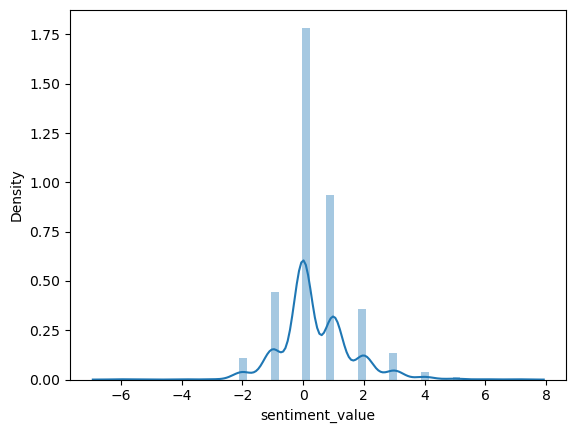

In [132]:
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

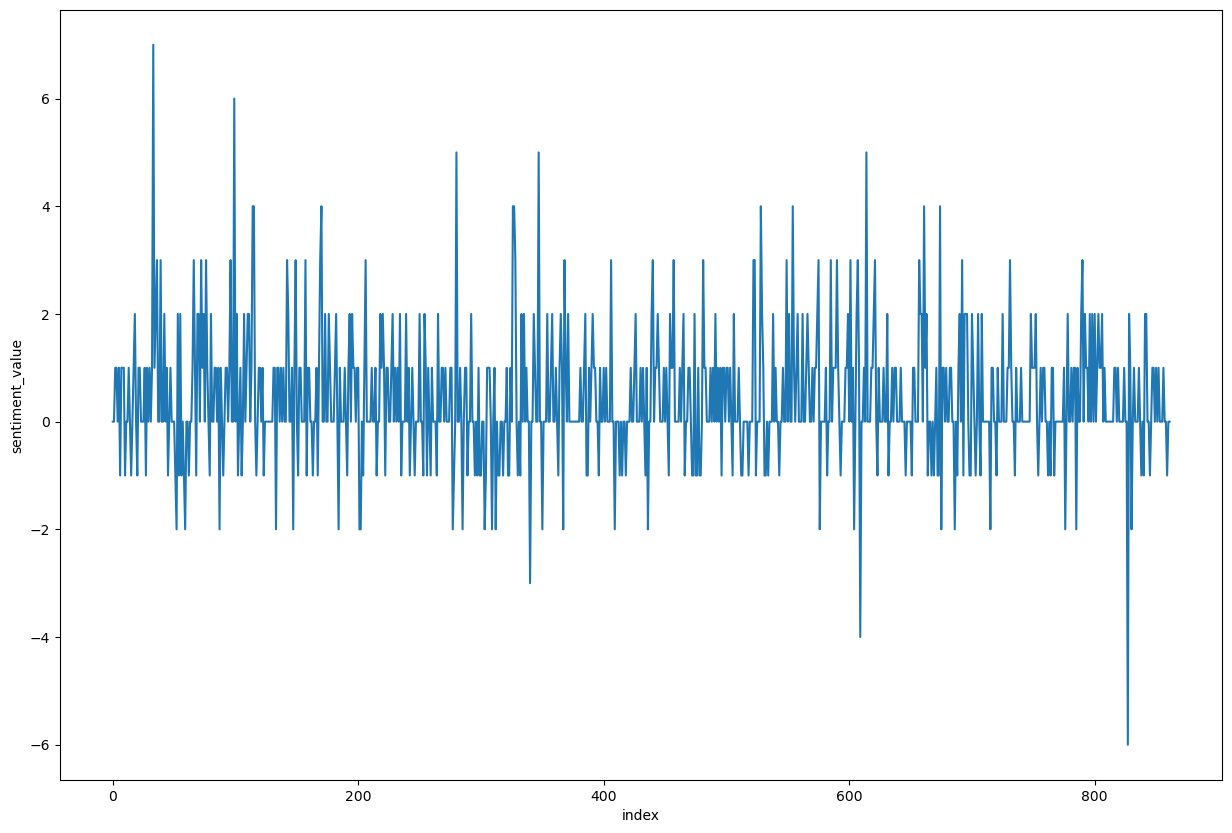

In [133]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

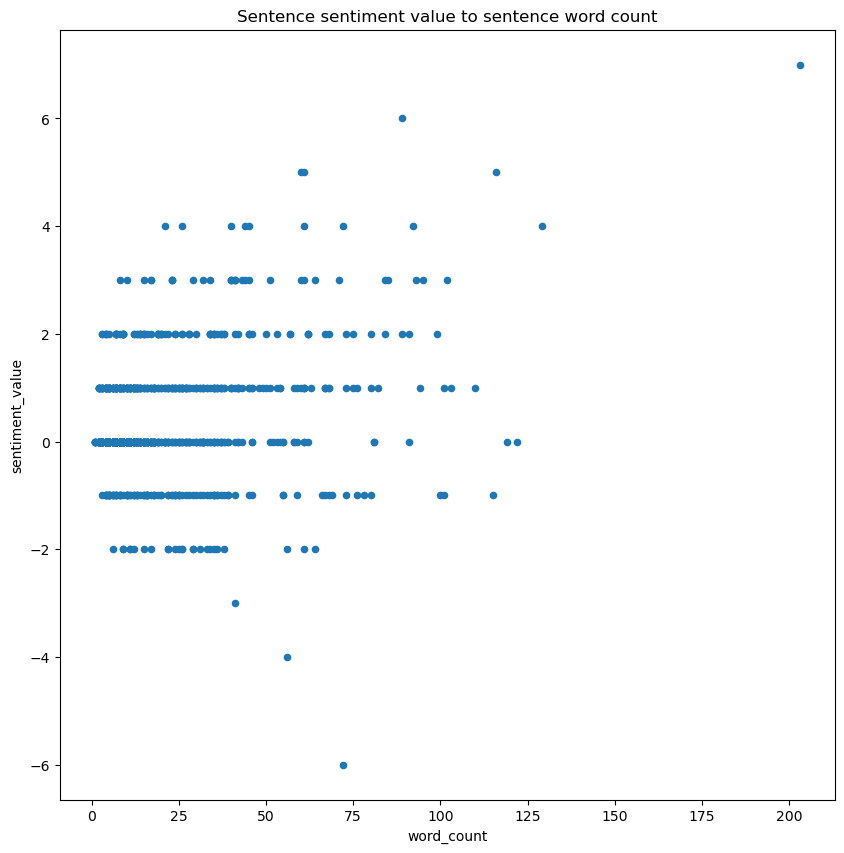

In [134]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')

### Positive and Negative words can't give us better results for sentimental analysis as compared to emos(afinn dataset) which gives us better analysis.